<a href="https://colab.research.google.com/github/gsssousak-coder/Start/blob/main/Erro%20padr%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#idade aposentadoria
dados_vida_aposentadoria = pd.read_csv("/content/dados_idade_aposentadoria.csv")

#tempo de vida de uma lâmpada
dados_vida_lampada = pd.read_csv("/content/dados_vida_lampada.csv")

#altura dos funcionários
dados_altura = pd.read_csv("/content/dados_alturas.csv")

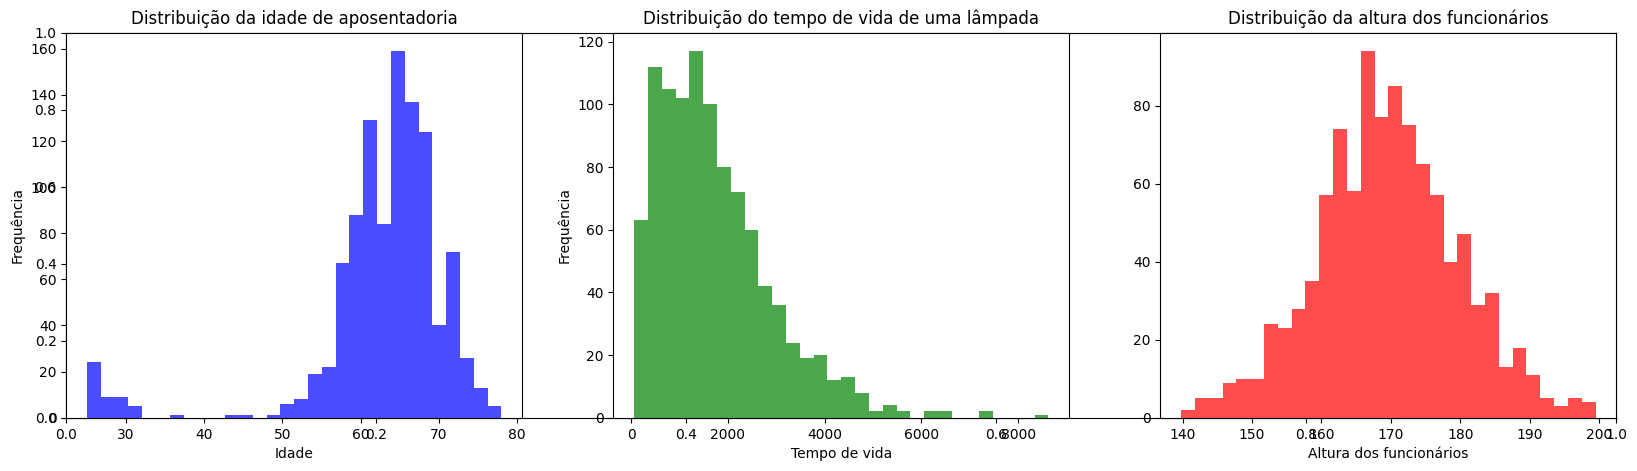

In [3]:
#Várias distribuições
plt.subplots(figsize=(20,5))
plt.subplot(131)
plt.title('Distribuição da idade de aposentadoria')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.hist(dados_vida_aposentadoria, bins=30, color='blue', alpha=0.7)

plt.subplot(132)
plt.title('Distribuição do tempo de vida de uma lâmpada')
plt.xlabel('Tempo de vida')
plt.ylabel('Frequência')
plt.hist(dados_vida_lampada, bins=30, color='green', alpha=0.7)

plt.subplot(133)
plt.title('Distribuição da altura dos funcionários')
plt.xlabel('Altura dos funcionários')
plt.ylabel('')
plt.hist(dados_altura, bins=30, color='red', alpha=0.7)

plt.show()



In [4]:
#tamanho da amostra
n =100
#quantidade de amostra
qnt = 100000
#função de reamostragem e cálculo das médias

def reamostragem_medias(dados, coluna, n, qnt):
  medias = [dados[coluna].sample(n, replace = True).mean()for _ in range(qnt)]
  return medias


In [5]:
#realizando as amostragens com função
medias_idade = reamostragem_medias(dados_vida_aposentadoria, 'idade', n , qnt)
medias_duracao = reamostragem_medias(dados_vida_lampada, 'duracao', n , qnt)
media_altura = reamostragem_medias(dados_altura, 'alturas', n , qnt)

In [6]:
print("*****    Médias populacionais   *****")
print("idade", dados_vida_aposentadoria['idade'].mean())
print("altura", dados_altura['alturas'].mean())
print("duracao", dados_vida_lampada['duracao'].mean())


*****    Médias populacionais   *****
idade 62.70857142857143
altura 169.52022
duracao 1731.8036029420002


In [7]:
def Average(lst):
  return sum(lst)/len(lst)

print("*********** Memórias pamostrais***********")

print("idade", Average(medias_idade))
print("altura", Average(media_altura))
print("duracao", Average(medias_duracao))

*********** Memórias pamostrais***********
idade 62.71153330000071
altura 169.51658112100023
duracao 1731.4767135419588


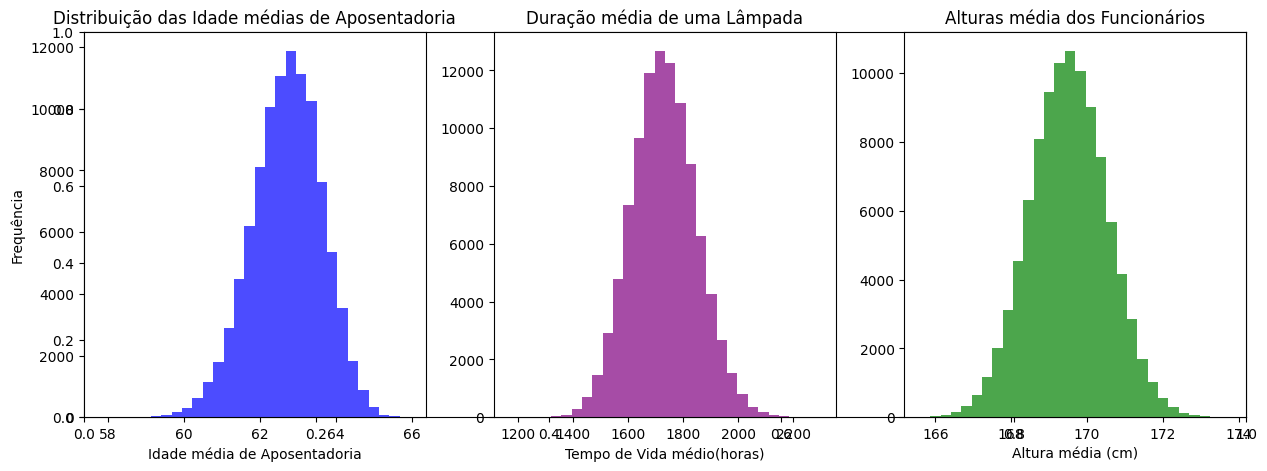

In [35]:
plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribuição das Idade médias de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(medias_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(medias_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')

plt.subplot(133)
plt.hist(media_altura, bins=30, alpha=0.7, color='green')
plt.title('Alturas média dos Funcionários')
plt.xlabel('Altura média (cm)')

plt.show()

In [9]:
#media da nova amostra
media_nova_amostra = 1200

In [10]:
# media original
dados_vida_lampada['duracao'].mean()

np.float64(1731.8036029420002)

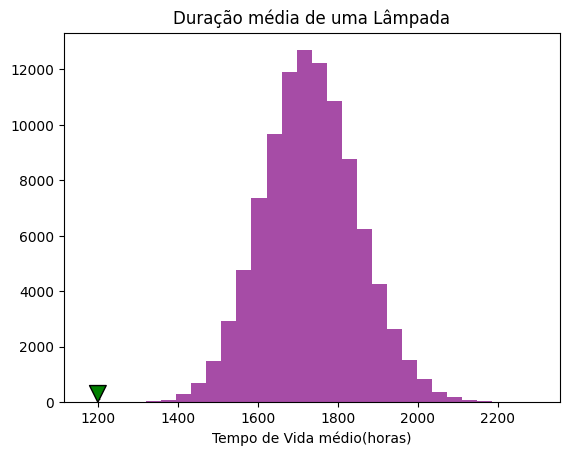

In [11]:
# Quão distante essa média está do comportamento?

plt.hist(medias_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [12]:
#transformando medias duração em DataFrame
duracao_amostras = pd.DataFrame({'medias_duracao': medias_duracao})

In [13]:
#calculando informações
media_das_medias = duracao_amostras['medias_duracao'].mean()
EP = duracao_amostras['medias_duracao'].std()

print("*****  Medidas amostrais *****")
print("média:", media_das_medias )
print("Erro Padrão:", EP )

*****  Medidas amostrais *****
média: 1731.4767135419181
Erro Padrão: 118.20173059960054


In [14]:
1732- EP

1613.7982694003995

In [15]:
1732 - 3*EP

1377.3948082011984

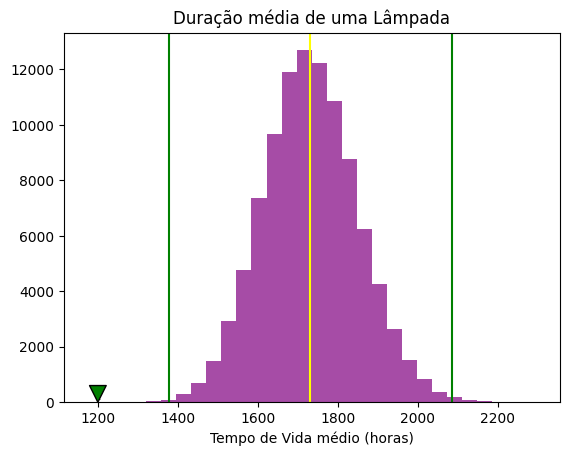

In [16]:
# Visualizando a quantidade de amostras entre 3EP +- da média.

plt.hist(medias_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio (horas)')
plt.axvline(media_das_medias, color = "yellow")
plt.axvline(media_das_medias + 3*EP , color = "green")
plt.axvline(media_das_medias - 3*EP , color = "green")
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [17]:
#quanto está no intervalo de +ou- dois desvio
qnt_obs = duracao_amostras[(duracao_amostras > media_das_medias - 3*EP) &
                          (duracao_amostras < media_das_medias + 3*EP)]

In [18]:
# quanto isso representa?
qnt_obs.count()/duracao_amostras.count()

,0
medias_duracao,0.99702


In [19]:
# quanto isso representa?
qnt_obs.count()/duracao_amostras.count()*100

,0
medias_duracao,99.702


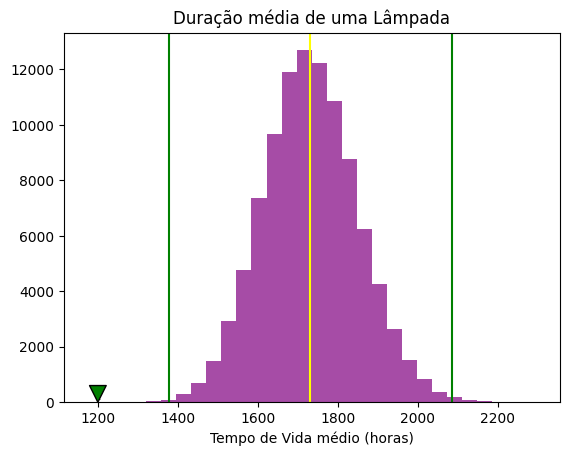

In [20]:
# Visualizando a quantidade de amostras entre 3EP +- da média.

plt.hist(medias_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio (horas)')
plt.axvline(media_das_medias, color = "yellow")
plt.axvline(media_das_medias + 3*EP , color = "green")
plt.axvline(media_das_medias - 3*EP , color = "green")
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [21]:
# importando o stats
from scipy import stats

In [22]:
# levar em consideração essa amostra
dados_vida_lampada

# nível de confiança definido
confianca = 0.95

In [23]:
#informações para o IC

media = dados_vida_lampada['duracao'].mean()
desvio_padrao_amostral = dados_vida_lampada['duracao'].std()
tamanho_amostra = len(dados_vida_lampada)

In [24]:
intervalo_confianca = stats.norm.interval(confianca)

In [25]:
# Calculando intervalo de confiança

intervalo_confianca = stats.norm.interval(confianca,
                                       loc=media ,
                                       scale=desvio_padrao_amostral/np.sqrt(tamanho_amostra))

In [26]:
# Visualizando os resultados

print("IC (95%):", intervalo_confianca)

IC (95%): (np.float64(1658.3741665835485), np.float64(1805.233039300452))


In [27]:
# Conjunto de dados TechTaste
df_techtaste = pd.DataFrame({'avaliacoes': [38, 44, 33, 42, 47, 33, 36, 39, 42, 36, 39, 34, 42, 42, 36, 43, 31, 35, 36, 41, 42, 30, 25, 38, 47, 36, 32, 45, 44, 45, 37, 48, 37, 36, 44, 49, 31, 45, 45, 40, 36, 50, 38, 34, 36, 42, 46, 49, 36, 34, 38, 31, 53, 40, 57, 40, 36, 42, 26, 50, 32, 43, 35, 37, 42, 30, 36, 43, 40, 43, 44, 52, 37, 51, 35, 47, 40, 50, 37, 49]})

In [28]:
desvio_padrao = df_techtaste['avaliacoes'].std()
print(f'Desvio padrão: {desvio_padrao:.2f}')

Desvio padrão: 6.42


In [29]:
erro_padrao = stats.sem(df_techtaste['avaliacoes'])
print(f'Erro padrão: {erro_padrao:.2f}')

Erro padrão: 0.72


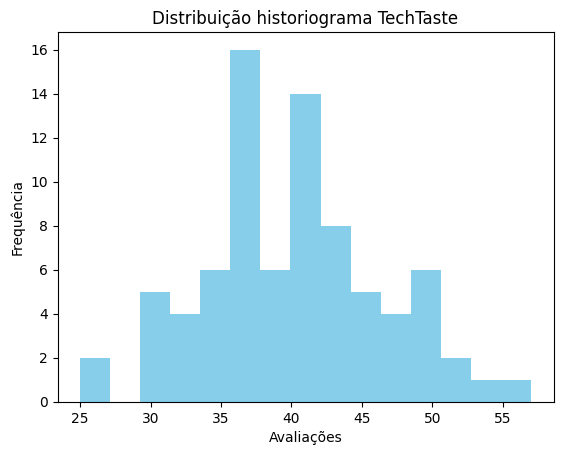

In [30]:
# Gráfico de histograma
plt.hist(df_techtaste['avaliacoes'], bins=15, color='skyblue')
plt.title('Distribuição historiograma TechTaste')
plt.xlabel('Avaliações')
plt.ylabel('Frequência')
plt.show()

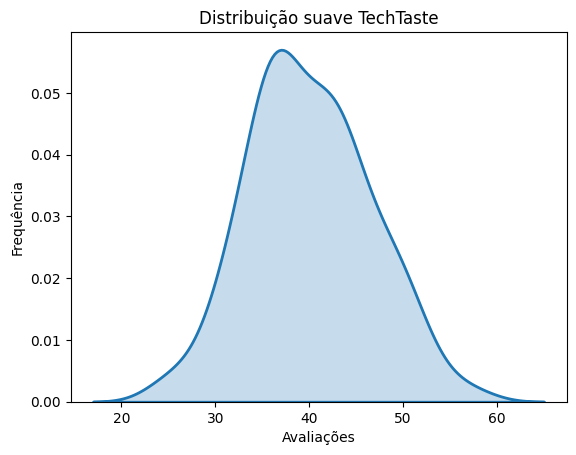

In [31]:
sns.kdeplot(df_techtaste['avaliacoes'], linewidth=2, fill= True)

plt.xlabel('Avaliações')
plt.ylabel('Frequência')
plt.title('Distribuição suave TechTaste')
plt.show()

In [32]:
confianca = 0.90
intervalo_confianca = stats.norm.interval(confianca,
                                       loc=df_techtaste['avaliacoes'].mean() ,
                                       scale=erro_padrao)

print(f'Intervalo de Confiança ({confianca*100}%): {intervalo_confianca}')

Intervalo de Confiança (90.0%): (np.float64(38.84402439920928), np.float64(41.205975600790715))


In [33]:
confianca = 0.95
intervalo_confianca = stats.norm.interval(confianca,
                                       loc=df_techtaste['avaliacoes'].mean() ,
                                       scale=erro_padrao)

print(f'Intervalo de Confiança ({confianca*100}%): {intervalo_confianca}')

Intervalo de Confiança (95.0%): (np.float64(38.617780776207844), np.float64(41.43221922379215))
